In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import math
import gillespy2
from gillespy2.basic_ssa_solver import BasicSSASolver

Unable to use Cython optimized SSA:
Error:No module named 'cython_ssa_solver'


In [4]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=1):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S = gillespy2.Species(name='S', initial_value=0)
        H = gillespy2.Species(name='H', initial_value=init_v)
        
        self.add_species([S,H])
        
        # parameters
        rate = gillespy2.Parameter(name='rate', expression=80.0)
        rate2 = gillespy2.Parameter(name='rate2', expression=10.0)
        
        self.add_parameter([rate,rate2])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={}, products={S:1},
                               propensity_function="rate * H")
        
        r2 = gillespy2.Reaction(name='r2', reactants={S:1}, products = {},
                                rate=rate2)
        
        self.add_reaction([r1,r2])
        self.timespan(numpy.linspace(0,100,1001))

In [5]:
model = DayModel()

In [6]:
%time results = model.run(solver=BasicSSASolver, show_labels=True)

Wall time: 213 ms


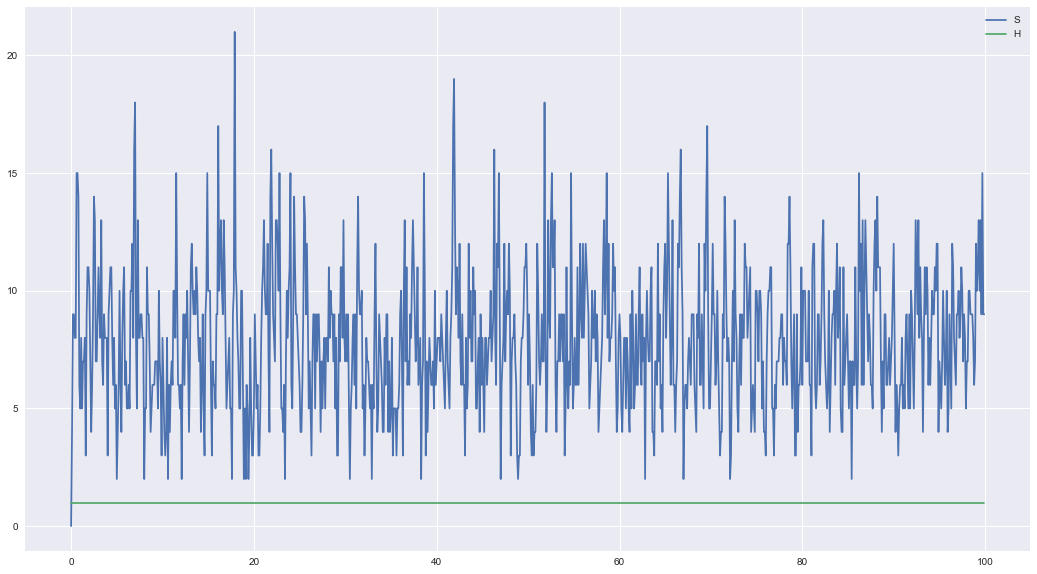

In [8]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['S'], label='S')
plt.plot(results['time'], results['H'], label='H')
plt.legend(loc='best')

